In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime


In [129]:
system_name = 'rossler'
# system_name = 'rabinovich_fabrikant'
system_name = 'lorentz'
# system_name = 'chua'
system_name += '1d'

time_start = datetime(2020, 7, 25, 18)  # 


In [130]:
result_file0 = './result_attention0.csv' 
df = pd.read_csv(result_file0, index_col = 'datetime')
df.index = pd.DatetimeIndex(df.index)
df = df[df.index > time_start]
set(df['model_name'])

{'ESN',
 'ESN-ATTN',
 'RBFLN',
 'RBFLN-RE-echostate',
 'RBFLN-RE-transform',
 'RBFN',
 'VAR'}

In [131]:
model_names = ['ESN', 'ESN-ATTN', 'RBFLN-RE-echostate']

average = pd.DataFrame()
for i in range(10):
    result_file = './result_attention' +str(i) + '.csv' 
    df = pd.read_csv(result_file, index_col = 'datetime')
    df.index = pd.DatetimeIndex(df.index)
    df = df[df.index > time_start]
    
    result = df[df['system_name'].isin([system_name]) & 
                df['model_name'].isin(model_names) & 
                df['n_history'].isin([1]) &
                df['horizon'].isin(list(range(11)))]
    

    final = None
    for w in set(result['horizon']):

        temp = result.loc[result['horizon'] == w, ['model_name', 'mse', 'horizon']].groupby('model_name').min().reset_index()

        final = temp if final is None else final.append(temp, ignore_index=True)
        
    average = average.append(final,ignore_index=True)

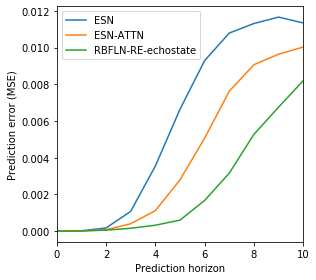

In [132]:
fig, ax = plt.subplots(figsize=(4.5,4))

for name in model_names:
    average.loc[average['model_name'] == name].groupby('horizon').mean().sort_values(by='horizon').plot(ax = ax)

plt.legend(labels= model_names, loc='upper left')
# ax.set_yscale("log")
# ax.set_xscale("log")
plt.xlabel('Prediction horizon')
plt.ylabel('Prediction error (MSE)')
plt.tight_layout()

# plt.savefig('../attention_'+system_name+'_mse_window'+datetime.now().strftime('_%Y_%m_%d_%H_%M')+'.pdf')
# plt.savefig('../_mse_window.pdf')
plt.show()